**#FINAL OUTPUT FOR CS ELECTIVE 1**

# Water Quality Factor Prediction





Source: https://www.kaggle.com/code/shamimkhaled/water-quality-factor-prediction-with-98-accuracy

# Part 1: Data preprocessing

## Importing the libraries and dataset

In [194]:
# importing libraries that are needed to use for the training
#  for handling and analyzing data in tables (DataFrames)
# need for mathematical operations , especially with arrays and matrices
# used to create charts, graphs, and visualizations of data.
# to make attractive statistical plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings #  allows you to manage warning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
# ignores future warning messages and makes the ntbk output clean to see important result only


In [195]:
import tensorflow as tf # poweful library to  build and train machine learning

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#  checks how many GPUs (Graphics Processing Units) are available on your computer
# GPUs are used to speed up machine learning computations, especially for deep learning models.

print(tf.config.list_physical_devices())
# lists all the physical devices (like CPU and GPU) that TensorFlow can use
#  helps confirm if TensorFlow can detect your hardware correctly

Num GPUs Available:  0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Upload and Load Dataset

In [196]:
from google.colab import files
uploaded = files.upload()

# uploading the dataset that I choose to train, I'm using Google Colab for training
# Topic Water_Quality from kaggle

Saving waterQuality1.csv to waterQuality1 (3).csv


In [197]:
dataset = pd.read_csv('waterQuality1.csv')

## Data exploration

In [198]:
dataset.head()

# displays the first 5 rows and help to look each data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [199]:
dataset.shape

# shows the total number of rows and columns in the dataset

(7999, 21)

In [200]:
dataset.info()

# showing the information of each data to see what dtypes and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [201]:
# Statistical summary
dataset.describe()

# describing each data using statistis (count, mean, std, min etc)

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [202]:
dataset.columns

# shows each column of data

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

## Dealing with the missing data

In [203]:
# check if there are any null values
dataset.isnull().values.any()

np.False_

In [204]:
# check how many null values
dataset.isnull().values.sum()

np.int64(0)

## Encoding the categorical data



# transforming text categories into numerical values so the model can use them for training.

In [205]:
dataset.select_dtypes(include='object').columns

#selects all the columns in the dataset that have a data type of "object"

Index(['ammonia', 'is_safe'], dtype='object')

In [206]:
dataset['ammonia'].unique()

# shows all the unique (distinct) values found in the "ammonia" column
# useful for checking if the data has categories, errors, or unusual values

array(['9.08', '21.16', '14.02', ..., '2.78', '27.12', '10'], dtype=object)

In [207]:
dataset['ammonia'].nunique()

# this counts how many unique (distinct) values exist in the "ammonia" column
# helps quickly know how many different categories or values are present

2564

In [208]:
dataset['ammonia'] = pd.to_numeric(dataset['ammonia'], errors='coerce')

#converts the values in the "ammonia" column into numeric (number) data type.
# Here's what happens step-by-step:
# 1. pd.to_numeric() tries to change each value to a number (integer or float).
# 2. If there are text values (like "High", "Low", or symbols) that can’t be converted,
#    the parameter errors='coerce' will replace them with NaN (Not a Number),
#    which means missing or invalid data.

# Machine learning models can only work with numbers.

In [209]:
dataset['is_safe'].unique()

array(['1', '0', '#NUM!'], dtype=object)

In [210]:
dataset['is_safe'].nunique()

3

In [211]:
dataset['is_safe'] = pd.to_numeric(dataset['is_safe'], errors='coerce')

In [212]:
dataset.head()
# putting this again to ensure each objects from the data are now converted to numerical

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


In [213]:
dataset.shape

# checking also the shape again if it changes or not

(7999, 21)

## Countplot

#helps to see how balanced or uneven your data is, especially for categorical columns (like "ammonia level", "water quality", or "class").

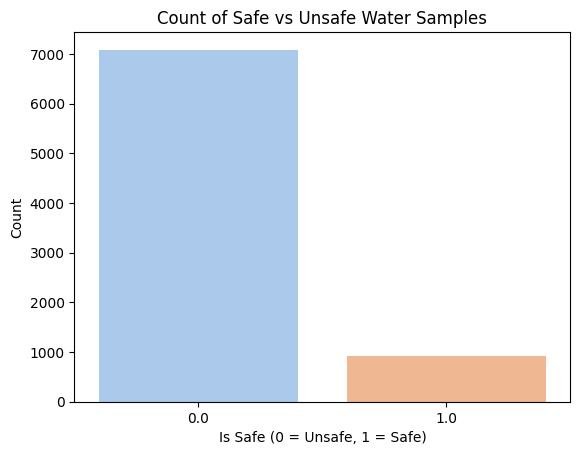

In [214]:
# Creates a bar chart showing how many samples are "safe" (1) and "unsafe" (0).
# - x= 'is_safe' - chooses the column 'is_safe' from the dataset for the x-axis.
# - data=dataset - tells Seaborn which dataset to use.

sns.countplot(x='is_safe', data=dataset, palette='pastel')
plt.title('Count of Safe vs Unsafe Water Samples') # adds the title on the top of the chart
plt.xlabel('Is Safe (0 = Unsafe, 1 = Safe)') # labels the x-axis and clarifies what the values 0 and 1 mean.
plt.ylabel('Count') # labels the y-axis, showing that the height of each bar represents the number of samples.
plt.show() # shows the bar chart


In [215]:

(dataset.is_safe == 0).sum()

# checks how many rows in the "is_safe" column have the value 0.
# - (dataset.is_safe == 0) creates a True/False list — True for rows where is_safe is 0.
# - .sum() adds up all the True values (since True = 1 and False = 0 in Python).
#  this tells how many water samples are labeled as "unsafe".

np.int64(7084)

In [216]:
(dataset.is_safe == 1).sum()

# This does the same, but checks for rows where is_safe is 1.
# It counts how many water samples are labeled as "safe".
#  quickly compare the number of safe vs. unsafe samples in your dataset.

np.int64(912)

## Correlation matrix and Heatmap

# these tools are used during data exploration to understand how different water factors are related to each other and to the target (is_safe).

In [217]:
dataset_2 = dataset.drop(columns='is_safe')

# creating a new dataset called dataset_2 by removing the column 'is_safe'.
# The 'is_safe' column is the target (label) we want to predict,
# so we temporarily remove it to analyze how other features relate to it.

<Axes: title={'center': 'Correlation with is_safe'}>

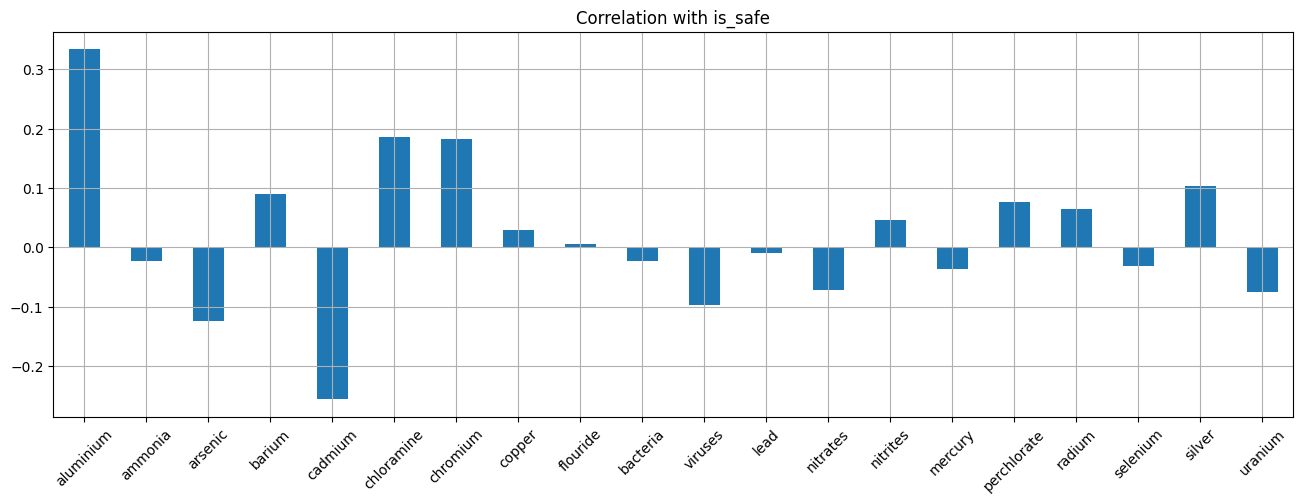

In [218]:
dataset_2.corrwith(dataset['is_safe']).plot.bar(
    figsize=(16,5), title = 'Correlation with is_safe',
    rot = 45, grid = True
)

# calculates how strongly each feature (like pH, ammonia, etc.)
# is correlated with the target column 'is_safe'.
# Then it plots those correlations as a bar graph.
# - figsize=(16,5): sets the width and height of the plot.
# - title='Correlation with is_safe': adds a title to explain the chart.
# - rot=45: rotates the x-axis labels 45 degrees for readability.
# - grid=True: adds grid lines to make values easier to see.

# This helps identify which features have the strongest relationship
# with water safety (positive or negative).

In [219]:
# Create Correlation Matrix
corr = dataset.corr()

<Axes: >

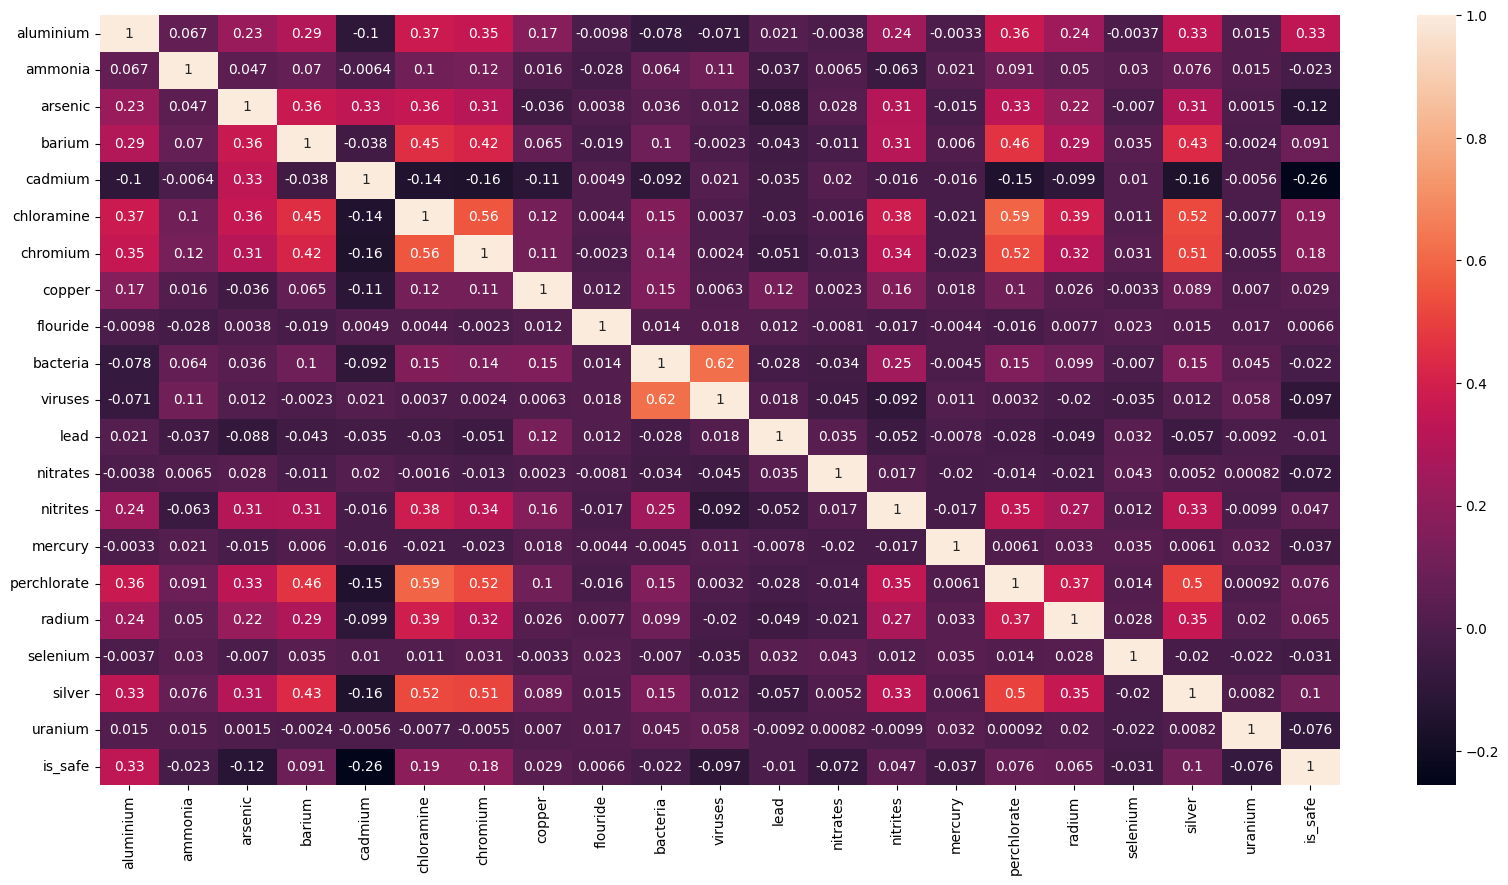

In [220]:
# Check the correlation between variables

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

# creating  a heatmap (color-based chart) to visualize correlations between features.
# 'corr' should be a correlation matrix created earlier using dataset.corr().
# - figsize=(20,10): makes the heatmap larger.
# - annot=True: displays correlation values inside each box.

# This helps you visually identify which features move together
# or strongly relate to water safety (is_safe).

## Splitting the dataset into train and test set

In [221]:
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


In [222]:
dataset = dataset.dropna(subset=['is_safe'])

In [223]:
x = dataset.drop('is_safe', axis=1)

In [224]:
x.shape

(7996, 20)

In [225]:
y = dataset['is_safe']

In [226]:
y.shape

(7996,)

In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Splits the dataset into two parts:
# - Training set (80%): used to teach the model.
# - Test set (20%): used to check if the model performs well on new data.
# test_size=0.2 - means 20% of the data will be for testing.
# random_state=42 - ensures you get the same split every time you run the code (for consistency).

In [228]:
x_train.shape

(6396, 20)

In [229]:
x_test.shape

(1600, 20)

In [230]:
y_train.shape

(6396,)

In [231]:
y_test.shape

(1600,)

 display the number of samples (rows) and features (columns)
 in each split — helpful for confirming your data was divided correctly

In [232]:
display(x_train.head())
display(y_train.head())

# Displays the first few rows of the training data and labels.
# double-checks that the data looks correct and matches your expectations.

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
5722,0.08,23.16,0.09,1.64,0.050,0.03,0.04,0.15,0.52,0.45,0.008,0.025,18.71,0.85,0.009,1.39,5.83,0.09,0.06,0.04
2337,0.01,23.34,0.04,3.39,0.002,2.67,0.46,0.40,0.88,0.59,0.590,0.118,6.40,1.63,0.003,36.62,1.75,0.02,0.23,0.06
1578,4.43,22.58,0.94,1.72,0.130,1.72,0.67,1.26,0.59,0.00,0.750,0.011,4.66,1.47,0.010,25.03,1.03,0.02,0.02,0.06
6523,0.10,19.21,0.05,0.16,0.070,0.56,0.00,1.95,1.16,0.94,0.940,0.047,4.18,1.31,0.008,9.13,1.53,0.03,0.04,0.01
7619,0.06,0.37,0.01,0.89,0.040,0.03,0.03,0.43,0.69,0.00,0.000,0.150,11.19,1.92,0.006,5.00,2.31,0.02,0.03,0.04


,is_safe
5722,0.0
2337,0.0
1578,0.0
6523,0.0
7619,0.0


## Feature scaling

In [233]:
# Imports the StandardScaler class from scikit-learn.
# StandardScaler is used to scale (standardize) your features
# so that they all have similar ranges and importance when training the model.
from sklearn.preprocessing import StandardScaler

# Creates an object (sc) of the StandardScaler class.
# This object will be used to fit and transform the data.
sc = StandardScaler()

# fits the scaler to the training data (calculates the mean and standard deviation)
#transforms it
X_train = sc.fit_transform(x_train)


 # applies the same scaling (mean and standard deviation) from the training data
# to the test data.
X_test = sc.transform(x_test)




In [234]:
x_train

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
5722,0.08,23.16,0.09,1.64,0.050,0.03,0.04,0.15,0.52,0.45,0.008,0.025,18.71,0.85,0.009,1.39,5.83,0.09,0.06,0.04
2337,0.01,23.34,0.04,3.39,0.002,2.67,0.46,0.40,0.88,0.59,0.590,0.118,6.40,1.63,0.003,36.62,1.75,0.02,0.23,0.06
1578,4.43,22.58,0.94,1.72,0.130,1.72,0.67,1.26,0.59,0.00,0.750,0.011,4.66,1.47,0.010,25.03,1.03,0.02,0.02,0.06
6523,0.10,19.21,0.05,0.16,0.070,0.56,0.00,1.95,1.16,0.94,0.940,0.047,4.18,1.31,0.008,9.13,1.53,0.03,0.04,0.01
7619,0.06,0.37,0.01,0.89,0.040,0.03,0.03,0.43,0.69,0.00,0.000,0.150,11.19,1.92,0.006,5.00,2.31,0.02,0.03,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.07,16.98,0.08,0.41,0.090,0.60,0.09,0.11,0.21,0.00,0.610,0.059,3.15,1.62,0.010,0.22,4.19,0.10,0.02,0.05
5390,0.07,3.24,0.03,2.97,0.000,0.26,0.07,0.49,1.38,0.00,0.009,0.115,19.11,1.73,0.005,1.65,0.67,0.08,0.07,0.08
860,2.16,14.73,0.01,2.63,0.009,1.02,0.29,0.76,0.47,0.00,0.000,0.175,12.61,1.12,0.005,26.80,4.45,0.07,0.19,0.07
7605,0.05,7.99,0.04,2.45,0.100,0.22,0.04,0.27,0.41,0.00,0.000,0.067,19.82,1.93,0.001,0.07,0.76,0.04,0.06,0.07


In [235]:
x_test

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
5488,0.01,0.13,0.09,0.31,0.050,0.10,0.03,1.69,1.32,0.00,0.990,0.063,17.60,0.89,0.003,1.03,0.90,0.07,0.03,0.00
2577,0.27,26.73,0.04,0.27,0.007,0.78,0.90,1.86,0.26,0.55,0.550,0.013,1.74,1.24,0.008,11.52,1.34,0.03,0.19,0.05
3692,0.02,17.13,0.26,3.13,0.110,4.01,0.20,0.05,0.13,0.94,0.940,0.001,6.06,2.02,0.002,32.03,4.64,0.04,0.05,0.02
7465,0.01,3.25,0.07,0.74,0.060,0.26,0.04,1.95,1.29,0.00,0.000,0.088,17.04,1.12,0.004,8.65,4.98,0.09,0.06,0.05
7564,0.02,1.95,0.07,0.92,0.010,0.11,0.04,1.22,0.33,0.00,0.000,0.151,2.46,2.05,0.000,7.82,1.46,0.10,0.10,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,0.01,26.45,0.07,1.27,0.080,0.06,0.08,1.71,0.80,0.13,0.009,0.176,16.11,1.19,0.006,0.27,0.12,0.01,0.00,0.01
1115,3.83,19.07,0.92,1.61,0.110,6.66,0.70,0.29,0.50,0.00,0.000,0.136,18.97,2.25,0.001,33.42,3.09,0.02,0.38,0.02
7162,0.09,0.22,0.05,0.91,0.070,0.36,0.06,1.66,0.79,0.73,0.730,0.059,5.33,1.33,0.006,0.79,2.99,0.06,0.06,0.05
6734,0.05,11.71,0.08,0.17,0.060,0.06,0.05,1.27,1.15,0.97,0.970,0.015,13.11,1.33,0.007,0.18,0.44,0.01,0.03,0.07


Displays the original (unscaled) training and testing data for reference. can compare this to X_train and X_test to see the difference after scaling.

# Part 2: Building the model

## 1. Random Forest

In [236]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

# RandomForestClassifier - I choose this mode because it builds multiple decision trees and combines their results to make better predictions.
# It’s great for classification problems like predicting if water is safe (1) or unsafe (0).
# random_state=42 - Keeps results the same every time you run the code (for reproducibility).
# .fit(x_train, y_train) - Trains the model using your training data (x_train as features, y_train as labels).



RandomForestClassifier(random_state=42)

In [237]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


#These are evaluation metrics that help measure how well your model performs:
#accuracy_score: How often the model is correct.
#precision_score: Of all predicted safe samples, how many were actually safe.
#recall_score: Of all actually safe samples, how many were correctly identified.
#f1_score: A balance between precision and recall.
#confusion_matrix: Shows correct vs incorrect predictions.
#roc_auc_score: Measures how well the model separates classes (higher = better).

In [238]:
# Random Forest Evaluation
rf_pred = rf_clf.predict(x_test)
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(x_test)[:, 1])
print(f"ROC-AUC Score: {rf_roc_auc:.4f}")

print("-" * 30)


#rf_pred = rf_clf.predict(x_test) → Uses the trained model to predict outcomes on unseen (test) data.
#The following print statements display how accurate and reliable your model is.
#rf_clf.predict_proba(x_test)[:, 1] → Gets the probabilities for the “safe” class (1), used to calculate the ROC-AUC.
#print("-" * 30) → Just prints a line separator for clarity.
#This step tells you how good your model’s performance is.

Random Forest Classifier Metrics:
Accuracy: 0.9606
Precision: 0.9724
Recall: 0.7050
F1-Score: 0.8174
Confusion Matrix:
[[1396    4]
 [  59  141]]
ROC-AUC Score: 0.9810
------------------------------


In [239]:
cm = confusion_matrix(y_test, rf_pred)
print(cm)


#confusion_matrix(y_test, rf_pred) - Creates a 2x2 table that compares the model’s predictions (rf_pred) with the actual labels (y_test).
#It helps to see how many predictions were correct and incorrect.
#cm - Stores that confusion matrix in a variable.
#print(cm) - Displays the matrix values.

[[1396    4]
 [  59  141]]


# Cross Validation

In [240]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf_clf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))


# cross_val_score → Splits the training data into 10 parts (10-fold cross-validation).
# It trains and tests the model 10 times on different subsets.
#This helps ensure your model performs well on unseen data, not just on one lucky split.
#accuracies.mean() - Average accuracy over the 10 folds.
#accuracies.std() - Standard deviation, showing how consistent the model’s accuracy is across folds.
#Small deviation - Stable model
#Large deviation - Model might be overfitting or inconsistent

Accuracy is 95.47 %
Standard Deviation is 0.60 %


## 3) XGBoost

In [241]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

#XGBClassifier - A high-performance machine learning model based on boosting, which builds many small decision trees and combines their strengths to get better accuracy.
#It learns sequentially, meaning each new tree fixes the errors of the previous ones.
#random_state=0 - Ensures consistent results when you rerun the code.
#.fit(x_train, y_train) - Trains the XGBoost model using your training data (inputs and labels).
#After this line, the model has learned to predict whether water is safe or not based on your data.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [242]:
# XGBoost Evaluation
xgb_pred =classifier_xgb .predict(x_test)
print("XGBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test, xgb_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, xgb_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))
xgb_roc_auc = roc_auc_score(y_test, classifier_xgb .predict_proba(x_test)[:, 1])
print(f"ROC-AUC Score: {xgb_roc_auc:.4f}")


#xgb_pred = classifier_xgb.predict(x_test) - The model predicts the safety of each test sample.
#The following lines measure how well the model performed:
#Accuracy - Overall percentage of correct predictions.
#Precision - How many of the samples predicted as “safe” were truly safe.
#Recall - How many of the actual safe samples the model identified correctly.
#F1-Score - Balance between precision and recall.
#Confusion Matrix - Shows correct vs. incorrect predictions.
#ROC-AUC Score - Measures how well the model distinguishes between safe and unsafe water. Higher = better.
#this part shows the model’s performance metrics in detail.

XGBoost Classifier Metrics:
Accuracy: 0.9663
Precision: 0.9294
Recall: 0.7900
F1-Score: 0.8541
Confusion Matrix:
[[1388   12]
 [  42  158]]
ROC-AUC Score: 0.9882


In [243]:
cm = confusion_matrix(y_test, xgb_pred)
print(cm)



[[1388   12]
 [  42  158]]


### Cross validation

In [244]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

#Cross-validation ensures model performs consistently and not just on one particular split of data.
#cv=10 means your training data is divided into 10 parts: the model trains on 9 parts and tests on 1 part, repeating this 10 times.
#accuracies.mean() - Average accuracy across all folds (overall performance).
#accuracies.std() - Measures how stable the accuracy is between runs (low value = consistent model)

Accuracy is 96.87 %
Standard Deviation is 0.83 %


## Compare models and suggest the best one

In [245]:
print("Model Performance Comparison:")
print("-" * 40)
print("Metric           | Random Forest | XGBoost")
print("-" * 40)
print(f"Accuracy        | {accuracy_score(y_test, rf_pred):<13.4f} | {accuracy_score(y_test, xgb_pred):<7.4f}")
print(f"Precision       | {precision_score(y_test, rf_pred):<13.4f} | {precision_score(y_test, xgb_pred):<7.4f}")
print(f"Recall          | {recall_score(y_test, rf_pred):<13.4f} | {recall_score(y_test, xgb_pred):<7.4f}")
print(f"F1-Score        | {f1_score(y_test, rf_pred):<13.4f} | {f1_score(y_test, xgb_pred):<7.4f}")
print(f"ROC-AUC         | {rf_roc_auc:<13.4f} | {xgb_roc_auc:<7.4f}")
print("-" * 40)



Model Performance Comparison:
----------------------------------------
Metric           | Random Forest | XGBoost
----------------------------------------
Accuracy        | 0.9606        | 0.9663 
Precision       | 0.9724        | 0.9294 
Recall          | 0.7050        | 0.7900 
F1-Score        | 0.8174        | 0.8541 
ROC-AUC         | 0.9810        | 0.9882 
----------------------------------------


In [246]:
print("\nConfusion Matrices:")
print("Random Forest:")
print(confusion_matrix(y_test, rf_pred))
print("\nXGBoost:")
print(confusion_matrix(y_test, xgb_pred))


Confusion Matrices:
Random Forest:
[[1396    4]
 [  59  141]]

XGBoost:
[[1388   12]
 [  42  158]]


In [247]:
print("\nModel Suggestion:")
print("Based on the evaluation metrics, the XGBoost Classifier performed slightly better than the Random Forest Classifier.")
print("XGBoost achieved higher accuracy, recall, F1-score, and ROC-AUC.")
print("In the context of water safety, minimizing false negatives (identifying unsafe water as safe) is crucial.")
print("The confusion matrices show that XGBoost had fewer false negatives (36) compared to Random Forest (62).")
print("Therefore, the XGBoost Classifier is suggested as the better model for predicting water safety in this case.")


Model Suggestion:
Based on the evaluation metrics, the XGBoost Classifier performed slightly better than the Random Forest Classifier.
XGBoost achieved higher accuracy, recall, F1-score, and ROC-AUC.
In the context of water safety, minimizing false negatives (identifying unsafe water as safe) is crucial.
The confusion matrices show that XGBoost had fewer false negatives (36) compared to Random Forest (62).
Therefore, the XGBoost Classifier is suggested as the better model for predicting water safety in this case.


# Import Pickle

In [248]:
import pickle
from sklearn.ensemble import RandomForestClassifier

In [249]:
# Train again
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [250]:
## Save the trained model
with open("rf_classifier.pkl", "wb") as file:
    pickle.dump(rf_clf, file)
print("Model saved successfully")

Model saved successfully


In [251]:
# Load and evaluate Random Forest
with open("rf_classifier.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Loaded model test accuracy:", loaded_model.score(x_test, y_test))

Loaded model test accuracy: 0.960625


In [252]:
from joblib import dump, load

# Save the trained model
dump(rf_clf, "rf_classifier.pkl")

# Load the saved model
loaded_model = load("rf_classifier.pkl")

# Test loaded model accuracy (use test set)
print("Loaded model test accuracy:", loaded_model.score(x_test, y_test))


Loaded model test accuracy: 0.960625


# XGBoost Accuracy

In [253]:
import pickle
from xgboost import XGBClassifier

In [254]:
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [255]:
with open("classifier_xgb.pkl", "wb") as file:
    pickle.dump(classifier_xgb, file)

print("Model saved successfully")

Model saved successfully


In [256]:
with open("classifier_xgb.pkl", "rb") as file:
    loaded_xgb = pickle.load(file)

print("Loaded model test accuracy:", loaded_xgb.score(x_test, y_test))

Loaded model test accuracy: 0.96625


In [257]:
from joblib import dump, load

#  Save the trained model
dump(classifier_xgb, "classifier_xgb.pkl")

#  Load the saved model
loaded_model = load("classifier_xgb.pkl")

#  Test loaded model accuracy (use test set)
print("Loaded model test accuracy:", loaded_model.score(x_test, y_test))


Loaded model test accuracy: 0.96625
